<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## Connection to drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [29]:
%matplotlib inline 

In [30]:
#General
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

## Import data

In [31]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

## Preprocess data

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Initialise classifiers

In [33]:
sig=SVC(kernel='sigmoid', C=1.5, coef0=-0.5, class_weight='balanced',decision_function_shape='ovo', random_state=36)
rbf=SVC(kernel='rbf', C=1, class_weight='balanced',decision_function_shape='ovo', random_state=42)
poly=SVC(kernel='poly', C=1, coef0=0.2, degree=2, class_weight='balanced',decision_function_shape='ovo', random_state=96)
gauss = GaussianNB(priors=[6/13,1/13, 6/13])
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)

## Stack the classifiers

0.7171296296296297


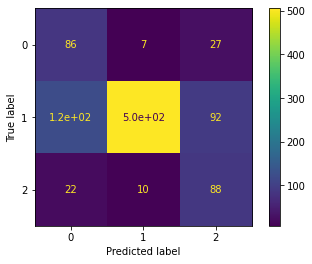

0.7212962962962962


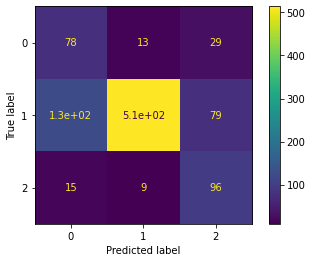

0.724074074074074


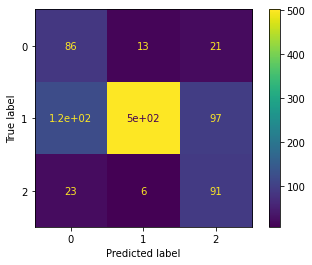

0.6819444444444445


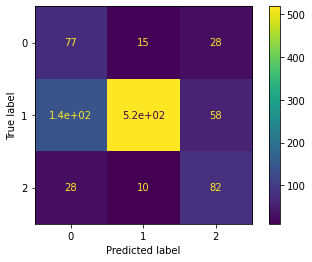

0.6833333333333332


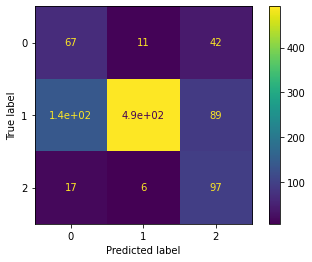

In [42]:
skf = StratifiedKFold(n_splits=5)
for train, val in skf.split(x_train, y_train):
  sig=SVC(kernel='sigmoid', C=1.5, coef0=-0.5, class_weight='balanced',decision_function_shape='ovo', random_state=36)
  rbf=SVC(kernel='rbf', C=1, class_weight='balanced',decision_function_shape='ovo', random_state=42)
  poly=SVC(kernel='poly', C=1, coef0=0.2, degree=2, class_weight='balanced',decision_function_shape='ovo', random_state=96)
  gauss = GaussianNB(priors=[6/13,1/13, 6/13])
  tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
  estimators = [
      ('sig', sig),
      ('rbf', rbf),
      ('poly', poly)
      #('gauss', gauss),
      #('tree', tree)
  ]
  clf = StackingClassifier(
      estimators=estimators, final_estimator=SVC(class_weight='balanced', decision_function_shape='ovo', random_state=0), n_jobs=-1
  )
  clf.fit(x_train[train], np.ravel(y_train)[train])
  print(balanced_accuracy_score(np.ravel(y_train)[val],clf.predict(x_train[val])))
  plot_confusion_matrix(clf, x_train[val], np.ravel(y_train)[val])
  plt.show()

In [43]:
sig=SVC(kernel='sigmoid', C=1.5, coef0=-0.5, class_weight='balanced',decision_function_shape='ovo', random_state=36)
rbf=SVC(kernel='rbf', C=1, class_weight='balanced',decision_function_shape='ovo', random_state=42)
poly=SVC(kernel='poly', C=1, coef0=0.2, degree=2, class_weight='balanced',decision_function_shape='ovo', random_state=96)
gauss = GaussianNB(priors=[6/13,1/13, 6/13])
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
estimators = [
    ('sig', sig),
    ('rbf', rbf),
    ('poly', poly)
    #('gauss', gauss),
    #('tree', tree)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(class_weight='balanced', decision_function_shape='ovo', random_state=0), n_jobs=-1
)
clf.fit(x_train, np.ravel(y_train))

StackingClassifier(cv=None,
                   estimators=[('sig',
                                SVC(C=1.5, break_ties=False, cache_size=200,
                                    class_weight='balanced', coef0=-0.5,
                                    decision_function_shape='ovo', degree=3,
                                    gamma='scale', kernel='sigmoid',
                                    max_iter=-1, probability=False,
                                    random_state=36, shrinking=True, tol=0.001,
                                    verbose=False)),
                               ('rbf',
                                SVC(C=1, break_ties=False, cache_size=200,
                                    class_weight='balanced'...
                                    probability=False, random_state=96,
                                    shrinking=True, tol=0.001,
                                    verbose=False))],
                   final_estimator=SVC(C=1.0, break_ties=False, cache_

## Write to file

In [44]:
y_pred=clf.predict(x_test)
df = pd.DataFrame(y_pred)
df.to_csv('aues.csv',header = ['y'], index_label = 'id')

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=36)

0.6860728083035458


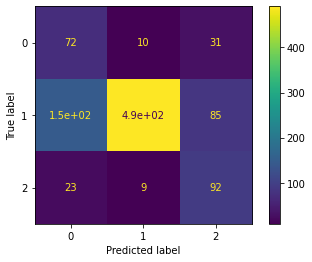

In [46]:
sig=SVC(kernel='sigmoid', C=1.5, coef0=-0.5, class_weight='balanced',decision_function_shape='ovo', random_state=36)
rbf=SVC(kernel='rbf', C=1, class_weight='balanced',decision_function_shape='ovo', random_state=42)
poly=SVC(kernel='poly', C=1, coef0=0.2, degree=2, class_weight='balanced',decision_function_shape='ovo', random_state=96)
gauss = GaussianNB(priors=[6/13,1/13, 6/13])
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
estimators = [
    ('sig', sig),
    ('rbf', rbf),
    ('poly', poly)
    #('gauss', gauss),
    #('tree', tree)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(class_weight='balanced', decision_function_shape='ovo', random_state=0), n_jobs=-1
)
clf.fit(X_train, np.ravel(Y_train))
print(balanced_accuracy_score(Y_val,clf.predict(X_val)))
plot_confusion_matrix(clf, X_val, np.ravel(Y_val))
plt.show()